In [2]:
import matplotlib
import pandas as pd
import codecs
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df1=pd.read_csv('2013_buyer.csv',encoding='big5')
df2=pd.read_csv('2014_buyer.csv',encoding='big5')
df3=pd.read_csv('2015_buyer.csv',encoding='big5')
df4=pd.read_csv('2016_buyer.csv',encoding='big5')
df5=pd.read_csv('2017_buyer.csv',encoding='big5')
df6=pd.read_csv('2018_buyer.csv',encoding='big5')
df10=pd.concat([df1,df2,df3,df4,df5,df6],ignore_index=True)
pd.set_option('display.max_rows',800)

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字設置-黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決保存圖像是負號'-'顯示為方塊的問題
#sns.set(font='SimHei')  # 解決Seaborn中文顯示問題
#ax.savefig('EYCB0105*.png',dpi=800)

In [6]:
#選取季節
df11=df10.loc[df10['季節名稱1']=='FALL']
df12=df10.loc[df10['季節名稱1']=='FA/WI']
df13=df10.loc[df10['季節名稱1']=='PRE FALL']
df14=df10.loc[df10['季節名稱1']=='WINTER']
df15=pd.concat([df11,df12,df13,df14],ignore_index=True)
#df15

In [7]:
#五大買家
buyer_all=df15.groupby(df15['最後買主1']).sum()
top_buyer=buyer_all.sort_values(by="接單數量1",ascending= False)
#top_buyer.iloc[0:5,:]

In [11]:
#儲存五大買家表格
#allfasum_buyer=allfa.groupby(allfa['最後買主1'])['接單數量1'].sum()
#allfasum_buyer=pd.DataFrame(allfasum_buyer)
#allfasum_buyer=allfasum_buyer.sort_values(by="接單數量1",ascending= False)
#allfasum_buyer.to_csv('TOP BUYER SUM.csv',encoding='big5')

In [12]:
#top_30_2017=top_30.loc[top_30['產品年度1']==2017]
#top_30_2017=top_30_2017.sort_values(by="接單數量1",ascending= False)
#top_30_2017.to_csv('Top30 product 2017.csv',encoding='big5')

In [10]:
#計算年度接單總量
df15.groupby(df15['產品年度1'])['接單數量1'].sum()

產品年度1
2013    2523126.6
2014    1824652.9
2015    1851884.6
2016    1246713.0
2017     992042.8
2018     871649.0
2019       5212.0
2020       1000.0
3013       4400.0
Name: 接單數量1, dtype: float64

In [15]:
#選取年度
all2013=df15.loc[df15['產品年度1']==2013]
all2014=df15.loc[df15['產品年度1']==2014]
all2015=df15.loc[df15['產品年度1']==2015]
all2016=df15.loc[df15['產品年度1']==2016]
all2017=df15.loc[df15['產品年度1']==2017]
all2018=df15.loc[df15['產品年度1']==2018]
all2019=df15.loc[df15['產品年度1']==2019]
allfa=pd.concat([all2013,all2014,all2015,all2016,all2017,all2018,all2019],ignore_index=True)

In [16]:
#計算產品佔該年度總量之百分比
per_pd=[]
allfa1=allfa.groupby([allfa['最後買主1'],allfa['產品代號'],allfa['產品年度1']])['接單數量1'].sum()
allfa1=allfa1.reset_index()

for i in range(len(allfa1)):
    if allfa1.loc[i,'產品年度1']==2013:
        a=allfa1.loc[i,'接單數量1']/2558323.6
        per_pd.append(a)
    elif allfa1.loc[i,'產品年度1']==2014:
        a=allfa1.loc[i,'接單數量1']/1824652.9
        per_pd.append(a)
    elif allfa1.loc[i,'產品年度1']==2015:
        a=allfa1.loc[i,'接單數量1']/1851933.8
        per_pd.append(a)
    elif allfa1.loc[i,'產品年度1']==2016:
        a=allfa1.loc[i,'接單數量1']/1246713
        per_pd.append(a)
    elif allfa1.loc[i,'產品年度1']==2017:
        a=allfa1.loc[i,'接單數量1']/909492.8
        per_pd.append(a)
    elif allfa1.loc[i,'產品年度1']==2018:
        a=allfa1.loc[i,'接單數量1']/871649
        per_pd.append(a)
    elif allfa1.loc[i,'產品年度1']==2019:
        a=allfa1.loc[i,'接單數量1']/5212
        per_pd.append(a)       

In [18]:
per_pd=pd.DataFrame(per_pd)#將list轉回dataframe資料格式
per_pd.columns = ['percent']#設定dataframe索引
allfa1=pd.concat([allfa1,per_pd],axis=1)

In [20]:
#計算產品2013~2018接單量總和
allfa1_2013=allfa1.loc[allfa1['產品年度1']==2013]
prodsum2013=allfa1_2013.groupby([allfa1_2013['產品代號'],allfa1_2013['產品年度1']])['接單數量1'].sum()
prodsum2013=pd.DataFrame(prodsum2013)
prodsum2013=prodsum2013.sort_values(by="接單數量1",ascending= False)
allfa1_2014=allfa1.loc[allfa1['產品年度1']==2014]
prodsum2014=allfa1_2014.groupby([allfa1_2014['產品代號'],allfa1_2014['產品年度1']])['接單數量1'].sum()
prodsum2014=pd.DataFrame(prodsum2014)
prodsum2014=prodsum2014.sort_values(by="接單數量1",ascending= False)
allfa1_2015=allfa1.loc[allfa1['產品年度1']==2015]
prodsum2015=allfa1_2015.groupby([allfa1_2015['產品代號'],allfa1_2015['產品年度1']])['接單數量1'].sum()
prodsum2015=pd.DataFrame(prodsum2015)
prodsum2015=prodsum2015.sort_values(by="接單數量1",ascending= False)
allfa1_2016=allfa1.loc[allfa1['產品年度1']==2016]
prodsum2016=allfa1_2016.groupby([allfa1_2016['產品代號'],allfa1_2016['產品年度1']])['接單數量1'].sum()
prodsum2016=pd.DataFrame(prodsum2016)
prodsum2016=prodsum2016.sort_values(by="接單數量1",ascending= False)
allfa1_2017=allfa1.loc[allfa1['產品年度1']==2017]
prodsum2017=allfa1_2017.groupby([allfa1_2017['產品代號'],allfa1_2017['產品年度1']])['接單數量1'].sum()
prodsum2017=pd.DataFrame(prodsum2017)
prodsum2017=prodsum2017.sort_values(by="接單數量1",ascending= False)
allfa1_2018=allfa1.loc[allfa1['產品年度1']==2018]
prodsum2018=allfa1_2018.groupby([allfa1_2018['產品代號'],allfa1_2018['產品年度1']])['接單數量1'].sum()
prodsum2018=pd.DataFrame(prodsum2018)
prodsum2018=prodsum2018.sort_values(by="接單數量1",ascending= False)
prodsum=pd.concat([prodsum2013,prodsum2014,prodsum2015,prodsum2016,prodsum2017,prodsum2018])
#prodsum.to_csv('Product sum per year(by order).csv',encoding='big5')

In [21]:
#計算2013 x商品被y號買家購買數量佔改年度出售總量之比例
pdsum2013=all2013.groupby(all2013['產品代號'])['接單數量1'].sum()
pdsum2013=pdsum2013.reset_index()
gp2013=all2013.groupby([all2013['最後買主1'],all2013['產品代號'],all2013['產品年度1']])['接單數量1'].sum()
gp2013=gp2013.reset_index()
abc=[]
for i in range(len(gp2013)):
    for j in range(len(pdsum2013)):
        
        if gp2013.loc[i,'產品代號'] == pdsum2013.loc[j,'產品代號']:
            
            a=gp2013.loc[i,'接單數量1']/pdsum2013.loc[j,'接單數量1']
            abc.append(a)
#print(abc) 

In [22]:
#計算2014 x商品被y號買家購買數量佔改年度出售總量之比例
pdsum2014=all2014.groupby(all2014['產品代號'])['接單數量1'].sum()
pdsum2014=pdsum2014.reset_index()
gp2014=all2014.groupby([all2014['最後買主1'],all2014['產品代號'],all2014['產品年度1']])['接單數量1'].sum()
gp2014=gp2014.reset_index()
n2014=[]
for i in range(len(gp2014)):
    for j in range(len(pdsum2014)):
        
        if gp2014.loc[i,'產品代號'] == pdsum2014.loc[j,'產品代號']:
            
            a=gp2014.loc[i,'接單數量1']/pdsum2014.loc[j,'接單數量1']
            n2014.append(a)
        

#print(n2014)
          

In [23]:
#計算2015 x商品被y號買家購買數量佔改年度出售總量之比例
pdsum2015=all2015.groupby(all2015['產品代號'])['接單數量1'].sum()
pdsum2015=pdsum2015.reset_index()
gp2015=all2015.groupby([all2015['最後買主1'],all2015['產品代號'],all2015['產品年度1']])['接單數量1'].sum()
gp2015=gp2015.reset_index()
n2015=[]
for i in range(len(gp2015)):
    for j in range(len(pdsum2015)):
        
        if gp2015.loc[i,'產品代號'] == pdsum2015.loc[j,'產品代號']:
            
            a=gp2015.loc[i,'接單數量1']/pdsum2015.loc[j,'接單數量1']
            n2015.append(a)
        

#print(n2015)


In [24]:
#計算2016 x商品被y號買家購買數量佔改年度出售總量之比例
pdsum2016=all2016.groupby(all2016['產品代號'])['接單數量1'].sum()
pdsum2016=pdsum2016.reset_index()
gp2016=all2016.groupby([all2016['最後買主1'],all2016['產品代號'],all2016['產品年度1']])['接單數量1'].sum()
gp2016=gp2016.reset_index()
n2016=[]
for i in range(len(gp2016)):
    for j in range(len(pdsum2016)):
        
        if gp2016.loc[i,'產品代號'] == pdsum2016.loc[j,'產品代號']:
            
            a=gp2016.loc[i,'接單數量1']/pdsum2016.loc[j,'接單數量1']
            n2016.append(a)
        

#print(n2016)



In [25]:
#計算2017 x商品被y號買家購買數量佔改年度出售總量之比例
pdsum2017=all2017.groupby(all2017['產品代號'])['接單數量1'].sum()
pdsum2017=pdsum2017.reset_index()
gp2017=all2017.groupby([all2017['最後買主1'],all2017['產品代號'],all2017['產品年度1']])['接單數量1'].sum()
gp2017=gp2017.reset_index()
n2017=[]
for i in range(len(gp2017)):
    for j in range(len(pdsum2017)):
        
        if gp2017.loc[i,'產品代號'] == pdsum2017.loc[j,'產品代號']:
            
            a=gp2017.loc[i,'接單數量1']/pdsum2017.loc[j,'接單數量1']
            n2017.append(a)
        

#print(n2017)

In [26]:
#計算2018 x商品被y號買家購買數量佔改年度出售總量之比例
pdsum2018=all2018.groupby(all2018['產品代號'])['接單數量1'].sum()
pdsum2018=pdsum2018.reset_index()
gp2018=all2018.groupby([all2018['最後買主1'],all2018['產品代號'],all2018['產品年度1']])['接單數量1'].sum()
gp2018=gp2018.reset_index()
n2018=[]
for i in range(len(gp2018)):
    for j in range(len(pdsum2018)):
        
        if gp2018.loc[i,'產品代號'] == pdsum2018.loc[j,'產品代號']:
            
            a=gp2018.loc[i,'接單數量1']/pdsum2018.loc[j,'接單數量1']
            n2018.append(a)
        

#print(n2018)

In [27]:
#各年度數量轉換成百分比表示
pdsum2013=all2013.groupby(all2013['產品代號'])['接單數量1'].sum()
pdsum2013=pdsum2013.reset_index()
gp2013=all2013.groupby([all2013['最後買主1'],all2013['產品代號']])['接單數量1'].sum()
gp2013=gp2013.reset_index()

In [29]:
#各年度數量轉換成百分比表示
df_abc=pd.DataFrame(abc)
percent_1= df_abc[0].apply(lambda x: str(x * 100) + '%')
percent_1
percent_2013=pd.concat([gp2013,percent_1],axis=1) #join_axes=[gp2013.index])            

In [30]:
#各年度數量轉換成百分比表示
df_n2014=pd.DataFrame(n2014)
percent_2= df_n2014[0].apply(lambda x: str(x * 100) + '%')
percent_2
percent_2014=pd.concat([gp2014,percent_2],axis=1,) #join_axes=[gp2014.index])

In [31]:
#各年度數量轉換成百分比表示
df_n2015=pd.DataFrame(n2015)
percent_3= df_n2015[0].apply(lambda x: str(x * 100) + '%')
percent_3
percent_2015=pd.concat([gp2015,percent_3],axis=1,)# join_axes=[gp2015.index])

In [32]:
#各年度數量轉換成百分比表示
df_n2016=pd.DataFrame(n2016)
percent_4= df_n2016[0].apply(lambda x: str(x * 100) + '%')
percent_4
percent_2016=pd.concat([gp2016,percent_4],axis=1)# join_axes=[gp2016.index])

In [36]:
#各年度數量轉換成百分比表示
df_n2017=pd.DataFrame(n2017)
percent_5= df_n2017[0].apply(lambda x: str(x * 100) + '%')
percent_2017=pd.concat([gp2017,percent_5],axis=1) #join_axes=[gp2017.index])

In [33]:
#各年度數量轉換成百分比表示
df_n2018=pd.DataFrame(n2018)
percent_6= df_n2018[0].apply(lambda x: str(x * 100) + '%')
percent_6
percent_2018=pd.concat([gp2018,percent_6],axis=1)# join_axes=[gp2018.index])

In [37]:
#找出前五大買家
all_percent=pd.concat([percent_2013,percent_2014,percent_2015,percent_2016,percent_2017,percent_2018],sort=False)
POLO_RA2_allper=all_percent.loc[all_percent['最後買主1']=='POLO RA2']
EXPRESS_allper=all_percent.loc[all_percent['最後買主1']=='EXPRESS ']
ORVIS_allper=all_percent.loc[all_percent['最後買主1']=='ORVIS   ']
THE_APPA_allper=all_percent.loc[all_percent['最後買主1']=='THE APPA']
ACTIVE_S_allper=all_percent.loc[all_percent['最後買主1']=='ACTIVE S']

In [38]:
#儲存前五大買家
POLO_RA2_allper.to_csv('POLO_RA2_allper_A.csv',encoding='big5')
EXPRESS_allper.to_csv('EXPRESS_allper_A.csv',encoding='big5')
ORVIS_allper.to_csv('ORVIS_allper_A.csv',encoding='big5')
THE_APPA_allper.to_csv('THE_APPA_allper_A.csv',encoding='big5')
ACTIVE_S_allper.to_csv('ACTIVE_S_allper_A.csv',encoding='big5')

In [39]:
#計算2013 X商品佔Y買家年度訂購總量之百分比
buyersum2013=all2013.groupby(all2013['最後買主1'])['接單數量1'].sum()
buyersum2013=buyersum2013.reset_index()
gp2013=all2013.groupby([all2013['最後買主1'],all2013['產品代號'],all2013['產品年度1']])['接單數量1'].sum()
gp2013=gp2013.reset_index()
np2013=[]
for i in range(len(gp2013)):
    for j in range(len(buyersum2013)):
        
        if gp2013.loc[i,'最後買主1'] == buyersum2013.loc[j,'最後買主1']:
            
            a=gp2013.loc[i,'接單數量1']/buyersum2013.loc[j,'接單數量1']
            np2013.append(a)
        

#print(np2013)


In [42]:
#各年度數量轉換成百分比表示
df_np2013=pd.DataFrame(np2013)
percent_1b= df_np2013[0].apply(lambda x: str(x * 100) + '%')
percent_1b
percent_2013b=pd.concat([gp2013,percent_1b],axis=1)# join_axes=[gp2013.index])


In [41]:
#計算2014 X商品佔Y買家年度訂購總量之百分比
buyersum2014=all2014.groupby(all2014['最後買主1'])['接單數量1'].sum()
buyersum2014=buyersum2014.reset_index()
gp2014=all2014.groupby([all2014['最後買主1'],all2014['產品代號'],all2014['產品年度1']])['接單數量1'].sum()
gp2014=gp2014.reset_index()
np2014=[]
for i in range(len(gp2014)):
    for j in range(len(buyersum2014)):
        
        if gp2014.loc[i,'最後買主1'] == buyersum2014.loc[j,'最後買主1']:
            
            a=gp2014.loc[i,'接單數量1']/buyersum2014.loc[j,'接單數量1']
            np2014.append(a)
        

#print(np2014)

In [44]:
#各年度數量轉換成百分比表示
df_np2014=pd.DataFrame(np2014)
percent_2b= df_np2014[0].apply(lambda x: str(x * 100) + '%')
percent_2b
percent_2014b=pd.concat([gp2014,percent_2b],axis=1)# join_axes=[gp2014.index])

In [45]:
#計算2015 X商品佔Y買家年度訂購總量之百分比
buyersum2015=all2015.groupby(all2015['最後買主1'])['接單數量1'].sum()
buyersum2015=buyersum2015.reset_index()
gp2015=all2015.groupby([all2015['最後買主1'],all2015['產品代號'],all2015['產品年度1']])['接單數量1'].sum()
gp2015=gp2015.reset_index()
np2015=[]
for i in range(len(gp2015)):
    for j in range(len(buyersum2015)):
        
        if gp2015.loc[i,'最後買主1'] == buyersum2015.loc[j,'最後買主1']:
            
            a=gp2015.loc[i,'接單數量1']/buyersum2015.loc[j,'接單數量1']
            np2015.append(a)
        

#print(np2015)

In [61]:
#各年度數量轉換成百分比表示
df_np2015=pd.DataFrame(np2015)
percent_3b= df_np2015[0].apply(lambda x: str(x * 100) + '%')
percent_3b
percent_2015b=pd.concat([gp2015,percent_3b],axis=1)#, join_axes=[gp2015.index])


In [62]:
#計算2016 X商品佔Y買家年度訂購總量之百分比
buyersum2016=all2016.groupby(all2016['最後買主1'])['接單數量1'].sum()
buyersum2016=buyersum2016.reset_index()
gp2016=all2016.groupby([all2016['最後買主1'],all2016['產品代號'],all2016['產品年度1']])['接單數量1'].sum()
gp2016=gp2016.reset_index()
np2016=[]
for i in range(len(gp2016)):
    for j in range(len(buyersum2016)):
        
        if gp2016.loc[i,'最後買主1'] == buyersum2016.loc[j,'最後買主1']:
            
            a=gp2016.loc[i,'接單數量1']/buyersum2016.loc[j,'接單數量1']
            np2016.append(a)
        

#print(np2016)

In [63]:
#各年度數量轉換成百分比表示
df_np2016=pd.DataFrame(np2016)
percent_4b= df_np2016[0].apply(lambda x: str(x * 100) + '%')
percent_4b
percent_2016b=pd.concat([gp2016,percent_4b],axis=1)# join_axes=[gp2016.index])



In [64]:
#計算2017 X商品佔Y買家年度訂購總量之百分比
buyersum2017=all2017.groupby(all2017['最後買主1'])['接單數量1'].sum()
buyersum2017=buyersum2017.reset_index()
gp2017=all2017.groupby([all2017['最後買主1'],all2017['產品代號'],all2017['產品年度1']])['接單數量1'].sum()
gp2017=gp2017.reset_index()
np2017=[]
for i in range(len(gp2017)):
    for j in range(len(buyersum2017)):
        
        if gp2017.loc[i,'最後買主1'] == buyersum2017.loc[j,'最後買主1']:
            
            a=gp2017.loc[i,'接單數量1']/buyersum2017.loc[j,'接單數量1']
            np2017.append(a)

#print(np2017)

In [65]:
#各年度數量轉換成百分比表示
df_np2017=pd.DataFrame(np2017)
percent_5b= df_np2017[0].apply(lambda x: str(x * 100) + '%')
percent_5b
percent_2017b=pd.concat([gp2017,percent_5b],axis=1)# join_axes=[gp2017.index])



In [66]:
#計算2018 X商品佔Y買家年度訂購總量之百分比
buyersum2018=all2018.groupby(all2018['最後買主1'])['接單數量1'].sum()
buyersum2018=buyersum2018.reset_index()
gp2018=all2018.groupby([all2018['最後買主1'],all2018['產品代號'],all2018['產品年度1']])['接單數量1'].sum()
gp2018=gp2018.reset_index()
np2018=[]
for i in range(len(gp2018)):
    for j in range(len(buyersum2018)):
        
        if gp2018.loc[i,'最後買主1'] == buyersum2018.loc[j,'最後買主1']:
            
            a=gp2018.loc[i,'接單數量1']/buyersum2018.loc[j,'接單數量1']
            np2018.append(a)

#print(np2018)

In [67]:
#各年度數量轉換成百分比表示
df_np2018=pd.DataFrame(np2018)
percent_6b= df_np2018[0].apply(lambda x: str(x * 100) + '%')
percent_6b
percent_2018b=pd.concat([gp2018,percent_6b],axis=1) #join_axes=[gp2018.index])


In [68]:
#找出前五大買家
all_percent_b=pd.concat([percent_2013b,percent_2014b,percent_2015b,percent_2016b,percent_2017b,percent_2018b])
POLO_RA2_allper_b=all_percent_b.loc[all_percent['最後買主1']=='POLO RA2']
EXPRESS_allper_b=all_percent_b.loc[all_percent['最後買主1']=='EXPRESS ']
ORVIS_allper_b=all_percent_b.loc[all_percent['最後買主1']=='ORVIS   ']
THE_APPA_allper_b=all_percent_b.loc[all_percent['最後買主1']=='THE APPA']
ACTIVE_S_allper_b=all_percent_b.loc[all_percent['最後買主1']=='ACTIVE S']

In [69]:
#儲存前五大買家資料
POLO_RA2_allper_b.to_csv('POLO_RA2_allper_B.csv',encoding='big5')
EXPRESS_allper_b.to_csv('EXPRESS_allper_B.csv',encoding='big5')
ORVIS_allper_b.to_csv('ORVIS_allper_B.csv',encoding='big5')
THE_APPA_allper_b.to_csv('THE_APPA_allper_B.csv',encoding='big5')
ACTIVE_S_allper_b.to_csv('ACTIVE_S_allper_B.csv',encoding='big5')

In [70]:
#找出2017前30大商品之各年度資料
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']])['接單數量1'].sum()
pdsum_all=pdsum_all.reset_index()
pdsum2017=all2017.groupby(all2017['產品代號']).sum()
pdsum2017=pdsum2017.reset_index()
top_pdsum2017=pdsum2017.sort_values(by="接單數量1",ascending= False)
top_pdsum2017_30=top_pdsum2017.iloc[0:30,:]
top_pdsum2017_30=top_pdsum2017_30.reset_index()
#a=top_pdsum2017_30['產品代號']


top_30=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2017_30)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2017_30.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            top_30.append(a)
            
#print(top_30)

In [61]:
#將資料轉換成DataFrame
top_30=pd.DataFrame(top_30)

In [33]:
#計算2017前30大商品佔各年度總量之比例
top_30_yearsum=top_30.groupby(top_30['產品年度1']).sum()
top_30_yearsum=top_30_yearsum.reset_index()

In [187]:
allfa_yearsum=allfa.groupby(allfa['產品年度1'])['接單數量1'].sum()
allfa_yearsum=allfa_yearsum.reset_index()

In [35]:
top_30_yearsum['接單數量1']/allfa_yearsum['接單數量1']

0    0.034222
1    0.132988
2    0.276133
3    0.222649
4    0.877361
5    0.519049
6         NaN
Name: 接單數量1, dtype: float64

In [203]:
#依同性質商品歸類成同一群組
for i in range(len(allfa)):
    if allfa.loc[i,'產品代號']=='EYDA0369':
        allfa.loc[i,'產品代號']='EYDA0394'
    elif allfa.loc[i,'產品代號']=='EYHG0074':
        allfa.loc[i,'產品代號']='EYHG0277'
    elif allfa.loc[i,'產品代號']=='EYHG0219':
        allfa.loc[i,'產品代號']='EYHG0277'
    elif allfa.loc[i,'產品代號']=='EYHG0269':
        allfa.loc[i,'產品代號']='EYHG0277'
    elif allfa.loc[i,'產品代號']=='EYHG0273':
        allfa.loc[i,'產品代號']='EYHG0277'
    elif allfa.loc[i,'產品代號']=='EYHG0076':
        allfa.loc[i,'產品代號']='EYHG0281'
    elif allfa.loc[i,'產品代號']=='EYHH0115':
        allfa.loc[i,'產品代號']='EYHH0178'
    elif allfa.loc[i,'產品代號']=='EYHH0078':
        allfa.loc[i,'產品代號']='EYHH0180'
    elif allfa.loc[i,'產品代號']=='EYHH0136':
        allfa.loc[i,'產品代號']='EYHH0180'

In [206]:
for i in range(len(allfa1)):
    if allfa1.loc[i,'產品代號']=='EYDA0369':
        allfa1.loc[i,'產品代號']='EYDA0394'
    elif allfa1.loc[i,'產品代號']=='EYHG0074':
        allfa1.loc[i,'產品代號']='EYHG0277'
    elif allfa1.loc[i,'產品代號']=='EYHG0219':
        allfa1.loc[i,'產品代號']='EYHG0277'
    elif allfa1.loc[i,'產品代號']=='EYHG0269':
        allfa1.loc[i,'產品代號']='EYHG0277'
    elif allfa1.loc[i,'產品代號']=='EYHG0273':
        allfa1.loc[i,'產品代號']='EYHG0277'
    elif allfa1.loc[i,'產品代號']=='EYHG0076':
        allfa1.loc[i,'產品代號']='EYHG0281'
    elif allfa1.loc[i,'產品代號']=='EYHH0115':
        allfa1.loc[i,'產品代號']='EYHH0178'
    elif allfa1.loc[i,'產品代號']=='EYHH0078':
        allfa1.loc[i,'產品代號']='EYHH0180'
    elif allfa1.loc[i,'產品代號']=='EYHH0136':
        allfa1.loc[i,'產品代號']='EYHH0180'

In [161]:
#找出2017賣出總量前10名之商品
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']]).sum()
pdsum_all=pdsum_all.reset_index()
pdsum2017=all2017.groupby(all2017['產品代號']).sum()
pdsum2017=pdsum2017.reset_index()
top_pdsum2017=pdsum2017.sort_values(by="接單數量1",ascending= False)
top_pdsum2017_10=top_pdsum2017.iloc[0:10,:]
top_pdsum2017_10=top_pdsum2017_10.reset_index()
#a=top_pdsum2017_30['產品代號']


top_10=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2017_10)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2017_10.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            
            top_10.append(a)
            
#print(top_10)




In [162]:
#將資料轉成DataFrame
top_10=pd.DataFrame(top_10)

In [163]:
#固定產品在圖上表示之顏色
color=['black','gray','silver','rosybrown','firebrick','red','darksalmon','sienna','sandybrown','bisque','tan','moccasin',
 'gold','darkkhaki','lightgoldenrodyellow','olivedrab','chartreuse','palegreen','darkgreen','seagreen',
       'mediumspringgreen','lightseagreen','paleturquoise','darkcyan','darkturquoise','deepskyblue','slategray',
       'royalblue','navy','blue','mediumpurple','darkorchid','plum','m','mediumvioletred','palevioletred','grey',
       'lightgray','lightcoral','maroon','mistyrose','coral','seashell','peachpuff','darkorange','navajowhite',
      'orange','darkgoldenrod','lemonchiffon','ivory','olive','yellowgreen','lawngreen','lightgreen','g','mediumseagreen'
      'mediumaquamarine','mediumturquoise','darkslategray','c','cadetblue','skyblue','dodgerblue','slategrey','darkblue',
      'slateblue','rebeccapurple','darkviolet','violet','fuchsia','deeppink','crimson','dimgray','darkgray','lightgrey',
      'indianred','darkred','salmon','orangered','chocolate','peru','burlywood','blanchedalmond','wheat','goldenrod',
      'khaki','beige','y','darkolivegreen','honeydew','forestgreen','green','springgreen','aquamarine','azure',
       'darkslategrey','aqua','powderblue','lightskyblue','lightslategray','lightsteelblue','lavender','mediumblue',
      'darkslateblue','blueviolet','mediumorchid','purple','magenta','hotpink','pink']

In [164]:
aaa=allfa.groupby(allfa['產品代號'])['接單數量1'].sum()
aaa=aaa.reset_index()
aaa=pd.DataFrame(aaa)
aaa=aaa.sort_values(by="接單數量1",ascending= False)
buyer_name=aaa['產品代號']

In [165]:
buyer_name=buyer_name.reset_index()
buyer_name=buyer_name['產品代號']
buyer_name=buyer_name.values.tolist()

In [166]:
color_palette={}
for i in range(len(buyer_name)):
    for i in range(len(color)):
        a={buyer_name[i]:color[i]}
        color_palette.update(a)

In [167]:
b={'EYDC0245':'teal'}
color_palette.update(b)
c={'EYEC0256':'cyan'}
color_palette.update(c)
d={'EYHI0194':'lightblue'}
color_palette.update(d)
e={'EYHI0197':'lightpink'}
color_palette.update(e)
f={'EYLA0183':'lime'}
color_palette.update(f)
g={'EYDC0253':'oldlace'}
color_palette.update(g)
h={'EYDH0136':'brown'}
color_palette.update(h)
i={'EYEH0171':'r'}
color_palette.update(i)
j={'EYDB0446':'tomato'}
color_palette.update(j)
k={'EYDC0252':'lightsalmon'}
color_palette.update(k)
l={'EYGB0131':'saddlebrown'}
color_palette.update(l)
m={'EYGC0039':'linen'}
color_palette.update(m)
n={'EYHG0296':'greenyellow'}
color_palette.update(n)
o={'EYHG0296':'yellow'}
color_palette.update(o)
p={'EYKB0189':'teal'}
color_palette.update(p)
q={'FPHB0378':'turquoise'}
color_palette.update(q)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


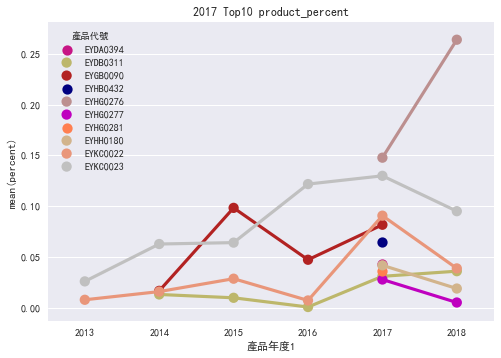

In [168]:
#畫出2017年前10大商品佔各年度銷售總量之百分比
top_10=pd.DataFrame(top_10)#將list轉為dataframe
x10=sns.pointplot(x="產品年度1",y='percent',data=top_10,hue='產品代號',palette=color_palette).set_title('2017 Top10 product_percent')

#fig = x10.get_figure()
#fig.savefig('2017 Top1~10PRODUCT(percnet).png',dpi=800)#儲存圖片


In [169]:
#找出2017賣出總量前10名之商品
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']])['接單數量1'].sum()
pdsum_all=pdsum_all.reset_index()
pdsum2017=all2017.groupby(all2017['產品代號']).sum()
pdsum2017=pdsum2017.reset_index()
top_pdsum2017=pdsum2017.sort_values(by="接單數量1",ascending= False)
top_pdsum2017_10A=top_pdsum2017.iloc[0:10,:]
top_pdsum2017_10A=top_pdsum2017_10A.reset_index()
#a=top_pdsum2017_30['產品代號']


top_10A=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2017_10A)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2017_10A.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            top_10A.append(a)
#print(top_10A)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


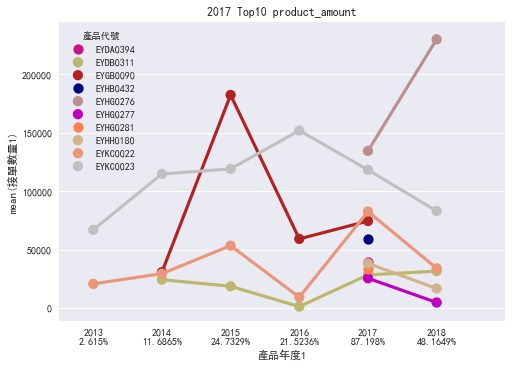

In [170]:
#畫出2017年前10大商品於各年度銷售量折線圖
top_10A=pd.DataFrame(top_10)#將list轉換成dataframe
x10A=sns.pointplot(x="產品年度1",y='接單數量1',data=top_10A,hue='產品代號',palette=color_palette)
x10A.set(xticks=range(0, 7), xticklabels=["2013\n2.615%","2014\n11.6865%","2015\n24.7329%","2016\n21.5236%","2017\n87.198%","2018\n48.1649%"])#設定橫軸內容
x10A.set_title('2017 Top10 product_amount')
fig = x10A.get_figure()
fig.savefig('2017 Top1~10PRODUCT(amount).png',dpi=800)

In [171]:
#找出2017賣出總量11~20名之商品
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']]).sum()
pdsum_all=pdsum_all.reset_index()
pdsum2017=all2017.groupby(all2017['產品代號']).sum()
pdsum2017=pdsum2017.reset_index()
top_pdsum2017=pdsum2017.sort_values(by="接單數量1",ascending= False)
top_pdsum2017_1120=top_pdsum2017.iloc[10:20,:]
top_pdsum2017_1120=top_pdsum2017_1120.reset_index()



top_1120=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2017_1120)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2017_1120.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            
            top_1120.append(a)


/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


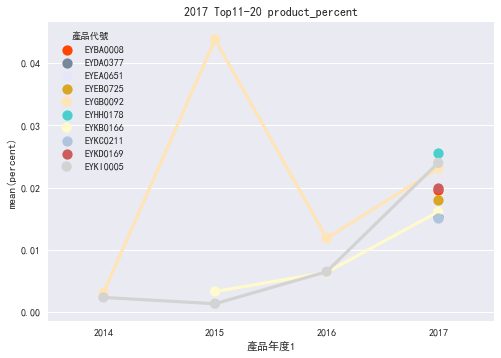

In [172]:
#畫出2017年11~20大商品佔各年度銷售總量之百分比
top_1120=pd.DataFrame(top_1120)
x1120=sns.pointplot(x="產品年度1",y='percent',data=top_1120,hue='產品代號',palette=color_palette).set_title('2017 Top11-20 product_percent')

#fig = x1120.get_figure()
#fig.savefig('2017 Top11~20PRODUCT(percent).png',dpi=800)

In [173]:
#找出2017賣出總量前10名之商品
pdsum_all=allfa.groupby([allfa['產品代號'],allfa['產品年度1']])['接單數量1'].sum()
pdsum_all=pdsum_all.reset_index()
pdsum2017=all2017.groupby(all2017['產品代號']).sum()
pdsum2017=pdsum2017.reset_index()
top_pdsum2017=pdsum2017.sort_values(by="接單數量1",ascending= False)
top_pdsum2017_1120A=top_pdsum2017.iloc[10:20,:]
top_pdsum2017_1120A=top_pdsum2017_1120A.reset_index()
#a=top_pdsum2017_30['產品代號']


top_1120A=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2017_1120A)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2017_1120A.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            top_1120A.append(a)
#print(top_11_20)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


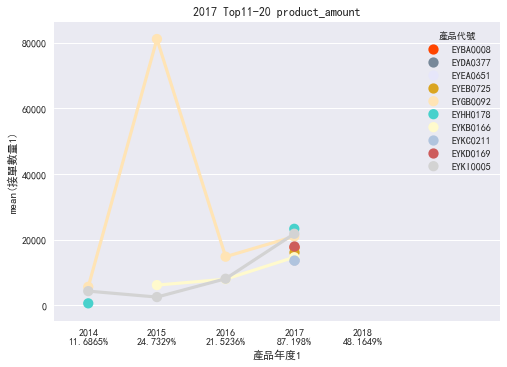

In [174]:
#畫出2017年21~30大商品於各年度銷售量折線圖
top_1120A=pd.DataFrame(top_1120A)
x1120A=sns.pointplot(x="產品年度1",y='接單數量1',data=top_1120A,hue='產品代號',palette=color_palette)
x1120A.set(xticks=range(0, 7), xticklabels=["2014\n11.6865%","2015\n24.7329%","2016\n21.5236%","2017\n87.198%","2018\n48.1649%"])
x1120A.set_title('2017 Top11-20 product_amount')
fig = x1120A.get_figure()
fig.savefig('top11~20PRODUCT(amount).png',dpi=800)

In [175]:
#找出2017賣出總量21~30名之商品
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']]).sum()
pdsum_all=pdsum_all.reset_index()
#pdsum_all['percent'].apply(lambda x: str(x * 100) + '%')
pdsum2017=all2017.groupby(all2017['產品代號']).sum()
pdsum2017=pdsum2017.reset_index()
top_pdsum2017=pdsum2017.sort_values(by="接單數量1",ascending= False)
top_pdsum2017_2130=top_pdsum2017.iloc[20:30,:]
top_pdsum2017_2130=top_pdsum2017_2130.reset_index()
#a=top_pdsum2017_30['產品代號']


top_2130=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2017_2130)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2017_2130.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            
            top_2130.append(a)



/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


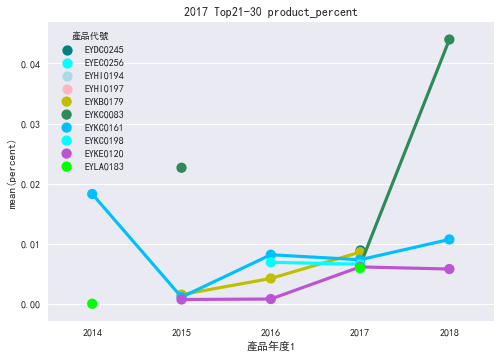

In [176]:
#畫出2017年21~30大商品佔各年度銷售總量之百分比
top_2130=pd.DataFrame(top_2130)
x2130=sns.pointplot(x="產品年度1",y='percent',data=top_2130,hue='產品代號',palette=color_palette).set_title('2017 Top21-30 product_percent')

#fig = x2130.get_figure()
#fig.savefig('2017 Top21~30PRODUCT(percent).png',dpi=800)

In [177]:
#找出2017賣出總量前10名之商品
pdsum_all=allfa.groupby([allfa['產品代號'],allfa['產品年度1']])['接單數量1'].sum()
pdsum_all=pdsum_all.reset_index()
pdsum2017=all2017.groupby(all2017['產品代號']).sum()
pdsum2017=pdsum2017.reset_index()
top_pdsum2017=pdsum2017.sort_values(by="接單數量1",ascending= False)
top_pdsum2017_2130A=top_pdsum2017.iloc[20:30,:]
top_pdsum2017_2130A=top_pdsum2017_2130A.reset_index()
#a=top_pdsum2017_30['產品代號']


top_2130A=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2017_2130A)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2017_2130A.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            top_2130A.append(a)
#print(top_21_30)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


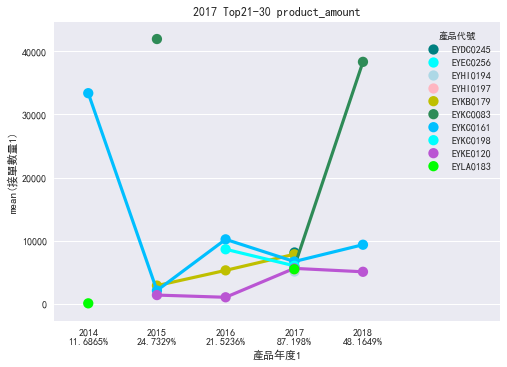

In [178]:
#畫出2017年21~30大商品於各年度銷售量折線圖
top_2130A=pd.DataFrame(top_2130A)
x2130A=sns.pointplot(x="產品年度1",y='接單數量1',data=top_2130A,hue='產品代號',palette=color_palette)
x2130A.set(xticks=range(0, 7), xticklabels=["2014\n11.6865%","2015\n24.7329%","2016\n21.5236%","2017\n87.198%","2018\n48.1649%"])
x2130A.set_title('2017 Top21-30 product_amount')
#fig = x2130A.get_figure()
#fig.savefig('2017 Top21~30PRODUCT(amount).png',dpi=800)

In [179]:
#選取五項商品資料
EYGC0029=allfa1.loc[allfa1['產品代號']=='EYKC0161']
EYDB0311=allfa1.loc[allfa1['產品代號']=='EYDB0311']
EYKC0022=allfa1.loc[allfa1['產品代號']=='EYKC0022']
EYKC0023=allfa1.loc[allfa1['產品代號']=='EYKC0023']
EYGB0090=allfa1.loc[allfa1['產品代號']=='EYGB0090']
PRODUCT_5=pd.concat([EYGC0029,EYDB0311,EYKC0022,EYKC0023,EYGB0090])
PRODUCT_5=PRODUCT_5.groupby([PRODUCT_5['產品代號'],PRODUCT_5['產品年度1']])['接單數量1'].sum()
PRODUCT_5=PRODUCT_5.reset_index()


/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


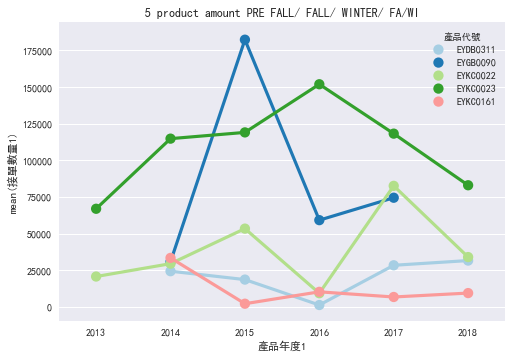

In [180]:
#畫出上面選取五項商品之折線圖
X5=sns.pointplot(x="產品年度1",y='接單數量1',data=PRODUCT_5,hue='產品代號',palette="Paired")
X5=X5.set_title('5 product amount PRE FALL/ FALL/ WINTER/ FA/WI')
fig = X5.get_figure()
fig.savefig('5 PRODUCT(2013-2018).png',dpi=800)
#EYGC0029
#EYKC0022
#EYKC0023
#EYGB0090
#EYDB0311

In [181]:
#排序找出2018前30大商品
pdsum2018=all2018.groupby(all2018['產品代號'])['接單數量1'].sum()
pdsum2018=pdsum2018.reset_index()
top_pdsum2018=pdsum2018.sort_values(by="接單數量1",ascending= False)
top_pdsum2018_30=top_pdsum2018.iloc[0:30,:]
top_pdsum2018_30.to_csv('Top 30 product 2018.csv', encoding='big5')
#top_pdsum2017_2130=top_pdsum2017_2130.reset_index()

In [182]:
#找出2018前30大商品各年度出貨量
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']])['接單數量1'].sum()
pdsum_all=pdsum_all.reset_index()
pdsum2018=all2018.groupby(all2018['產品代號']).sum()
pdsum2018=pdsum2018.reset_index()
top_pdsum2018=pdsum2018.sort_values(by="接單數量1",ascending= False)
top_pdsum2018_30=top_pdsum2018.iloc[0:30,:]
top_pdsum2018_30=top_pdsum2018_30.reset_index()
#a=top_pdsum2017_30['產品代號']


top2018_30=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2018_30)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2018_30.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            top2018_30.append(a)
            
            

In [183]:
#計算2018年前30大商品出貨量各年度總和
top2018_30=pd.DataFrame(top2018_30)
top2018_30_sum=top2018_30.groupby(top2018_30['產品年度1']).sum()
top2018_30_sum=top2018_30_sum.reset_index()
top2018_30_sum

,產品年度1,接單數量1
0,2013,994341.8
1,2014,216771.0
2,2015,288436.0
3,2016,189370.0
4,2017,445961.1
5,2018,792316.8


In [188]:
#計算2018年前30大商品總出售量占各年度總量之百分比
abc=allfa_yearsum.loc[0:5]
top2018_30_sum['接單數量1']/abc['接單數量1']

0    0.394091
1    0.118801
2    0.155753
3    0.151895
4    0.449538
5    0.908986
Name: 接單數量1, dtype: float64

In [189]:
#找出2018賣出總量前10名之商品
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']]).sum()
pdsum_all=pdsum_all.reset_index()
#pdsum_all['percent'].apply(lambda x: str(x * 100) + '%')
pdsum2018=all2018.groupby(all2018['產品代號']).sum()
pdsum2018=pdsum2018.reset_index()
top_pdsum2018=pdsum2018.sort_values(by="接單數量1",ascending= False)
top_pdsum2018_10=top_pdsum2018.iloc[0:10,:]
top_pdsum2018_10=top_pdsum2018_10.reset_index()
#a=top_pdsum2017_30['產品代號']


top2018_10=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2018_10)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2018_10.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            
            top2018_10.append(a)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


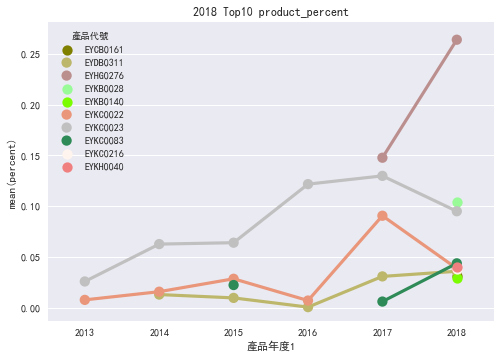

In [190]:
#畫出2018年前10大商品佔各年度銷售總量之百分比
top2018_10=pd.DataFrame(top2018_10)
x2018_10=sns.pointplot(x="產品年度1",y='percent',data=top2018_10,hue='產品代號',palette=color_palette).set_title('2018 Top10 product_percent')
#fig = x2018_10.get_figure()
#fig.savefig('2018 Top10PRODUCT(percent).png',dpi=800)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


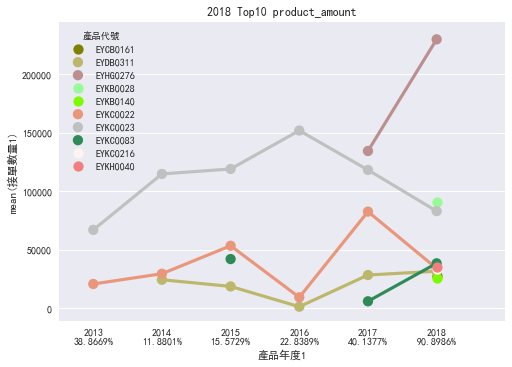

In [191]:
#畫出2018年前10大商品於各年度銷售量折線圖
x2018_A=sns.pointplot(x="產品年度1",y='接單數量1',data=top2018_10,hue='產品代號',palette=color_palette)
x2018_A.set(xticks=range(0, 7), xticklabels=["2013\n38.8669%",'2014\n11.8801%',"2015\n15.5729%","2016\n22.8389%","2017\n40.1377%","2018\n90.8986%"])
x2018_A.set_title('2018 Top10 product_amount')
#fig = x2018_A.get_figure()
#fig.savefig('2018 Top10 PRODUCT(amount).png',dpi=800)


In [210]:
#找出2018賣出總量11~20名之商品
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']]).sum()
pdsum_all=pdsum_all.reset_index()
#pdsum_all['percent'].apply(lambda x: str(x * 100) + '%')
pdsum2018=all2018.groupby(all2018['產品代號']).sum()
pdsum2018=pdsum2018.reset_index()
top_pdsum2018=pdsum2018.sort_values(by="接單數量1",ascending= False)
top_pdsum2018_1120=top_pdsum2018.iloc[10:20,:]
top_pdsum2018_1120=top_pdsum2018_1120.reset_index()
#a=top_pdsum2017_30['產品代號']


top2018_1120=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2018_1120)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2018_1120.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            
            top2018_1120.append(a)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


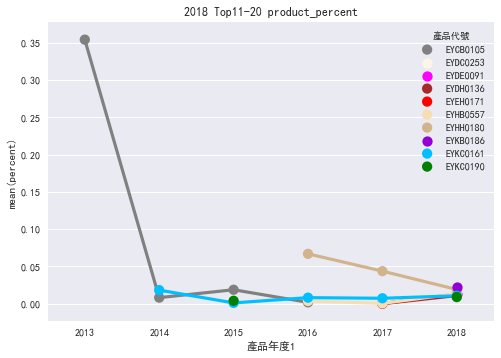

In [211]:
#畫出2018年11~20大商品佔各年度銷售總量之百分比
top2018_1120=pd.DataFrame(top2018_1120)
x2018_1120=sns.pointplot(x="產品年度1",y='percent',data=top2018_1120,hue='產品代號',palette=color_palette).set_title('2018 Top11-20 product_percent')
#fig = x2018_1120.get_figure()
#fig.savefig('2018 Top11-20 PRODUCT(percent).png',dpi=800)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


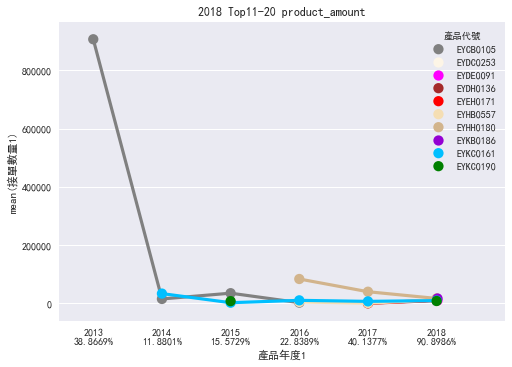

In [212]:
#畫出2018年11~20大商品於各年度銷售量折線圖
x2018_1120A=sns.pointplot(x="產品年度1",y='接單數量1',data=top2018_1120,hue='產品代號',palette=color_palette)
x2018_1120A.set(xticks=range(0, 7), xticklabels=["2013\n38.8669%",'2014\n11.8801%',"2015\n15.5729%","2016\n22.8389%","2017\n40.1377%","2018\n90.8986%"])
x2018_1120A.set_title('2018 Top11-20 product_amount')
#fig = x2018_1120A.get_figure()
#fig.savefig('2018 Top11-20 PRODUCT(amount).png',dpi=800)

In [207]:
#找出2018賣出總量21~30名之商品
pdsum_all=allfa1.groupby([allfa1['產品代號'],allfa1['產品年度1']]).sum()
pdsum_all=pdsum_all.reset_index()
#pdsum_all['percent'].apply(lambda x: str(x * 100) + '%')
pdsum2018=all2018.groupby(all2018['產品代號']).sum()
pdsum2018=pdsum2018.reset_index()
top_pdsum2018=pdsum2018.sort_values(by="接單數量1",ascending= False)
top_pdsum2018_2130=top_pdsum2018.iloc[20:30,:]
top_pdsum2018_2130=top_pdsum2018_2130.reset_index()
#a=top_pdsum2017_30['產品代號']


top2018_2130=[]
for i in range(len(pdsum_all)):
    for j in range(len(top_pdsum2018_2130)):
        if  pdsum_all.loc[i,'產品代號']== top_pdsum2018_2130.loc[j,'產品代號']:
            a=pdsum_all.loc[i]
            
            top2018_2130.append(a)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


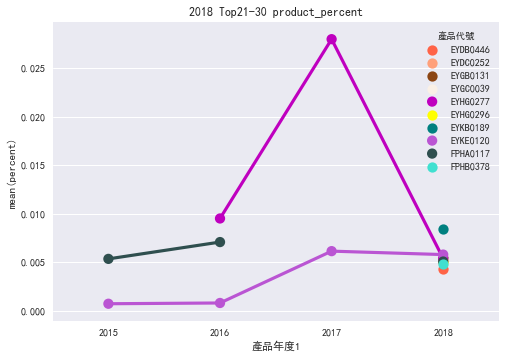

In [208]:
#畫出2018年21~30大商品佔各年度銷售總量之百分比
top2018_2130=pd.DataFrame(top2018_2130)
x2018_2130=sns.pointplot(x="產品年度1",y='percent',data=top2018_2130,hue='產品代號',palette=color_palette).set_title('2018 Top21-30 product_percent')
#fig = x2018_2130.get_figure()
#fig.savefig('2018 Top21-30 PRODUCT(percent).png',dpi=800)

/Users/James/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


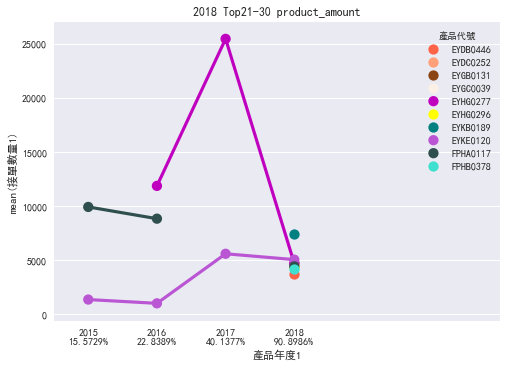

In [209]:
#畫出2018年21~30大商品於各年度銷售量折線圖
x2018_2130A=sns.pointplot(x="產品年度1",y='接單數量1',data=top2018_2130,hue='產品代號',palette=color_palette)
x2018_2130A.set(xticks=range(0, 7), xticklabels=["2015\n15.5729%","2016\n22.8389%","2017\n40.1377%","2018\n90.8986%"])
x2018_2130A.set_title('2018 Top21-30 product_amount')
#fig = x2018_2130A.get_figure()
#fig.savefig('2018 Top21-30 PRODUCT(amount).png',dpi=800)

In [93]:
df21=pd.read_csv('2013_good.csv',encoding='big5')
df22=pd.read_csv('2014_good.csv',encoding='big5')
df23=pd.read_csv('2015_good.csv',encoding='big5')
df24=pd.read_csv('2016_good.csv',encoding='big5')
df25=pd.read_csv('2017_good.csv',encoding='big5')
df26=pd.read_csv('2018_good.csv',encoding='big5')
df27=pd.concat([df21,df22,df23,df24,df25,df26],ignore_index=True)